In [1]:
%pylab inline
import numpy as np
import pandas as pd
import scipy as sp
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

Populating the interactive namespace from numpy and matplotlib


# statsmodels

regression

In [13]:
def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit()
    return result.params

In [28]:
path='/Users/yisheng/JOB/Consulting/MM/data/ex1.xls'
data=pd.read_excel(path, header=0,index_col='Date',sheetname='tickers')

In [29]:
ret=data.pct_change().dropna()

In [30]:
by_m=ret.groupby(lambda x:x.month)
by_m.mean()

,GOOG,AAPL,SPX
1,0.000781,0.000807,0.001234
2,0.000086,0.000505,-0.001061
3,0.000720,-0.000646,-0.002322
4,-0.002150,0.000198,-0.000092
5,-0.000900,-0.002425,-0.000759
6,0.000415,-0.001956,-0.001957
7,-0.002276,0.004618,-0.000070
8,-0.002034,0.003636,-0.001000
9,-0.001172,0.005750,-0.000410


In [31]:
by_m.apply(regress,'GOOG',['SPX','AAPL'])

,SPX,AAPL,intercept
1,0.096147,0.149935,0.000541
2,-0.269052,-0.046530,-0.000176
3,-0.176413,-0.528671,-0.000031
4,0.269902,-0.156344,-0.002094
5,0.026393,0.162896,-0.000485
6,-0.141648,0.116284,0.000365
7,0.065644,-0.054280,-0.002021
8,-0.194170,0.050993,-0.002414
9,-0.062503,0.025956,-0.001347


In [32]:
Y = ret['GOOG']
X = ret[['SPX','AAPL']]
X['intercept'] = 1.
result = sm.OLS(Y, X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GOOG   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.7209
Date:                Mon, 07 May 2018   Prob (F-statistic):              0.487
Time:                        23:14:54   Log-Likelihood:                 823.74
No. Observations:                 261   AIC:                            -1641.
Df Residuals:                     258   BIC:                            -1631.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SPX           -0.0533      0.065     -0.827      0.409      -0.180       0.074
AAPL          -0.0493      0.057     -0.861      0.390      -0.162       0.063
intercept     -0.0007      0.001     -1.099      0.273      -0.002       0.001
==============================================================================
Omnibus:                        0.964   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.617   Jarque-Bera (JB):                0.829
Skew:                           0.137   Prob(JB):                        0.661
Kurtosis:                       3.036   Cond. No.                         101.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
xpred=[100,92,110]
ypred=result.predict(xpred)
ypred

array([-9.94742005])

The statistical model is assumed to be

$Y = X\beta + \mu, where \mu\sim N\left(0,\Sigma\right).$

Depending on the properties of$ \Sigma$, we have currently four classes available:

GLS : generalized least squares for arbitrary covariance $\Sigma$

OLS : ordinary least squares for i.i.d. errors $\Sigma=\textbf{I}$

WLS : weighted least squares for heteroskedastic errors $\text{diag}\left  (\Sigma\right)$

GLSAR : feasible generalized least squares with autocorrelated AR(p) errors $\Sigma=\Sigma\left(\rho\right)$

In [136]:
nsample = 50
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, (x - 5)**2))
X = sm.add_constant(X)
beta = [5., 0.5, -0.01]
sig = 0.5
w = np.ones(nsample)
w[nsample * 6//10:] = 3
y_true = np.dot(X, beta)
e = np.random.normal(size=nsample)
y = y_true + sig * w * e 
X = X[:,[0,1]]

In [138]:
mod = sm.OLS(y, X)
res= mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     275.3
Date:                Sun, 13 May 2018   Prob (F-statistic):           1.63e-21
Time:                        14:21:36   Log-Likelihood:                -71.120
No. Observations:                  50   AIC:                             146.2
Df Residuals:                      48   BIC:                             150.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5449      0.285     19.430      0.000       4.971       6.119
x1             0.4080      0.025     16.593      0.000       0.359       0.457
==============================================================================
Omnibus:                        1.393   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.498   Jarque-Bera (JB):                0.788
Skew:                           0.290   Prob(JB):                        0.674
Kurtosis:                       3.207   Cond. No.                         23.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
mod_wls = sm.WLS(y, X, weights=1./w)
res_wls = mod_wls.fit()
res_wls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.881
Model:                            WLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     355.6
Date:                Sun, 13 May 2018   Prob (F-statistic):           7.81e-24
Time:                        14:20:41   Log-Likelihood:                -63.141
No. Observations:                  50   AIC:                             130.3
Df Residuals:                      48   BIC:                             134.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4248      0.209     25.948      0.000       5.004       5.845
x1             0.4223      0.022     18.857      0.000       0.377       0.467
==============================================================================
Omnibus:                        2.057   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.358   Jarque-Bera (JB):                1.576
Skew:                           0.250   Prob(JB):                        0.455
Kurtosis:                       2.288   Cond. No.                         17.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

统计检测

In [ ]:
durbin_watson（resids [，axis]）计算Durbin-Watson统计量,测试序列相关系
jarque_bera（resids [，axis]）计算Jarque-Bera测试的正态性
omni_normtest（resids [，axis]）Omnibus测试是否正态
medcouple（y [，axis]）计算偏斜的medcouple健壮度量。
robust_skewness（y [，axis]）计算Kim＆White中的四个偏度度量
robust_kurtosis（y [，axis，ab，dg，excess]）计算Kim＆White中的四个峰度度量
expected_robust_kurtosis（[ab，dg]）假定数据是正态分布的，计算Kim和White中鲁棒峭度度量值的期望值。
acorr_ljungbox（x [，lag，boxpierce]）没有自相关的Ljung-Box测试
acorr_breusch_godfrey（results [，nlags，store]）Breusch Godfrey Lagrange乘子测试残余自相关
HetGoldfeldQuandt测试2个子样本中方差是否相同
het_goldfeldquandt测试异方差
het_breuschpagan（resid，exog_het）Breusch-Pagan Lagrange Multiplier test for heteroscedasticity
het_white（resid，exog [，retres]）异方差的白色拉格朗日乘子测试
het_arch（resid [，maxlag，autolag，store，...]）Engle的自回归条件异方差检验（ARCH）
linear_harvey_collier（res）Harvey Collier测试线性
linear_rainbow（res [，frac]）用于线性的彩虹测试
linear_lm（resid，exog [，func]）拉格朗日乘子测试线性对功能替代
breaks_cusumolsresid（olsresidual [，ddof]）基于ols残差的参数稳定性的cumum测试
breaks_hansen（olsresults）模型稳定性测试，ols参数中断，Hansen 1992
recursive_olsresiduals（olsresults [，skip，...]）用残差和cusum测试统计计算递归ols
CompareCox Cox Test用于非嵌套模型
compare_cox针对非嵌套模型的Cox测试
CompareJ J-Test用于比较非嵌套模型
compare_j用于比较非嵌套模型的J-Test
unitroot_adf（x [，maxlag，trendorder，...]）
normal_ad（x [，轴]）正态分布的未知均值和方差的Anderson-Darling检验
kstest_normal（x [，pvalmethod]）lilliefors测试正常性，
lilliefors（x [，pvalmethod]）lilliefors测试正常性

variance_inflation_factor（exog，exog_idx）方差膨胀因子VIF，用于一个外生变量。测试多重共线性

In [41]:
durbin_watson(result.resid)#2完全无关，0正相关，4负相关

2.021102195193048

经验分布拟合

In [42]:
from statsmodels.distributions.empirical_distribution import ECDF

In [44]:
ecdf=ECDF(data['GOOG'])

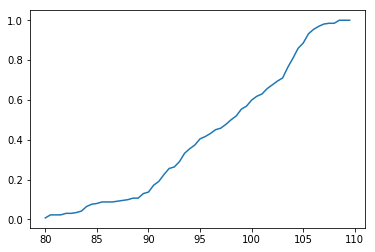

In [51]:
plot(np.arange(80,110,0.5),ecdf(np.arange(80,110,0.5)))

时间序列

In [52]:
from datetime import datetime
now = datetime.now()

In [53]:
now

datetime.datetime(2018, 5, 8, 23, 59, 42, 173312)

In [54]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(926, 56700)

In [56]:
delta.days

926

In [57]:
stamp = datetime(2011, 1, 3)
str(stamp)

'2011-01-03 00:00:00'

In [58]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [59]:
datestrs = ['2011-07-06', '2011-08-06','2011-08-09']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06', '2011-08-06', '2011-08-09'], dtype='datetime64[ns]', freq=None)

In [61]:
frame = pd.DataFrame(np.random.randn(2, 4),index=pd.date_range('1/1/2000', periods=2,
freq='W-WED'),
columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.224999,-0.219203,0.235551,0.151465
2000-01-12,-0.850913,-1.294278,-0.262056,0.073741


In [62]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.224999,-0.219203,0.235551,0.151465
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.850913,-1.294278,-0.262056,0.073741


In [63]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.224999,-0.219203,0.235551,0.151465
2000-01-06,-0.224999,-0.219203,0.235551,0.151465
2000-01-07,-0.224999,-0.219203,0.235551,0.151465
2000-01-08,-0.224999,-0.219203,0.235551,0.151465
2000-01-09,-0.224999,-0.219203,0.235551,0.151465
2000-01-10,-0.224999,-0.219203,0.235551,0.151465
2000-01-11,-0.224999,-0.219203,0.235551,0.151465
2000-01-12,-0.850913,-1.294278,-0.262056,0.073741


In [64]:
frame = pd.DataFrame(np.random.randn(2, 4),index=pd.date_range('1/1/2000', periods=2,
freq='A'),
columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-12-31,-0.435652,-0.163682,-0.141939,-0.142457
2001-12-31,-0.242742,1.625029,2.302933,-1.534688


In [65]:
frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000-12-31,-0.435652,-0.163682,-0.141939,-0.142457
2001-03-31,-0.435652,-0.163682,-0.141939,-0.142457
2001-06-30,-0.435652,-0.163682,-0.141939,-0.142457
2001-09-30,-0.435652,-0.163682,-0.141939,-0.142457
2001-12-31,-0.242742,1.625029,2.302933,-1.534688


In [154]:
import pandas_datareader.data as web
symbol = 'WIKI/AAPL'  # or 'AAPL.US'
df = web.DataReader(symbol, 'quandl', '2015-01-01', '2017-03-05')

In [71]:
df=df.sort_index()

In [151]:
df.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2017-03-03,138.78,139.8300,138.590,139.78,21571121.0,0.0,1.0,137.655862,138.697357,137.467401,138.647762,21571121.0
2017-03-02,140.00,140.2786,138.760,138.96,26210984.0,0.0,1.0,138.865980,139.142323,137.636024,137.834404,26210984.0
2017-03-01,137.89,140.1500,137.595,139.79,36414585.0,0.0,1.0,136.773071,139.014765,136.480461,138.657681,36414585.0
2017-02-28,137.08,137.4350,136.700,136.99,23482860.0,0.0,1.0,135.969633,136.321757,135.592711,135.880362,23482860.0
2017-02-27,137.14,137.4350,136.280,136.93,20257426.0,0.0,1.0,136.029147,136.321757,135.176113,135.820848,20257426.0


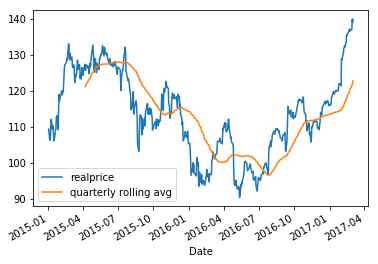

In [74]:
df['Close'].plot()
df['Close'].rolling(65).mean().plot()
legend(['realprice','quarterly rolling avg'])

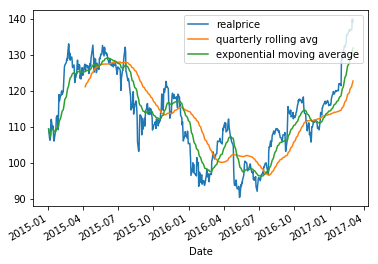

In [76]:
df['Close'].plot()
df['Close'].rolling(65).mean().plot()
df['Close'].ewm(span=30).mean().plot()
legend(['realprice','quarterly rolling avg','exponential moving average'])

指数滑动平均

${\displaystyle S_{t}={\begin{cases}Y_{1},&t=1\\\alpha \cdot Y_{t}+(1-\alpha )\cdot S_{t-1},&t>1\end{cases}}}$


${\displaystyle {\text{EMA}}_{\text{today}}={\frac {p_{1}+(1-\alpha )p_{2}+(1-\alpha )^{2}p_{3}+(1-\alpha )^{3}p_{4}+\cdots }{1+(1-\alpha )+(1-\alpha )^{2}+(1-\alpha )^{3}+\cdots }},}$

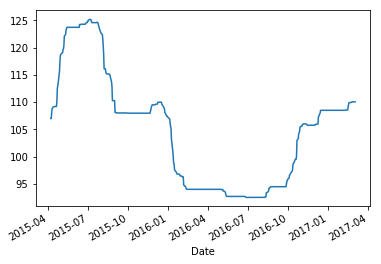

In [80]:
df['Close'].rolling(65).apply(lambda x:np.percentile(x,5)).plot()#5%分位数

ARMA 模型

In [83]:
import random
values = [4, 4]
N = 1000
b0 = 0.8
b1 = -0.4
noise = normal(0, 0.1, N)
for i in range(N):
    new_x = values[-1] * b0 + values[-2] * b1 + noise[i]#AR(2)
    values.append(new_x)

In [87]:
MAXLAGS=5
model = sm.tsa.AR(values)
results = model.fit(MAXLAGS)
results.params

array([-0.00387415,  0.79342802, -0.38096275,  0.01254636, -0.03117309,
        0.01549008])

In [88]:
MAXLAGS=2
model = sm.tsa.AR(values)
results = model.fit(MAXLAGS)
results.params

array([-0.00392338,  0.81498929, -0.39705231])

In [90]:
from statsmodels.graphics.tsaplots import plot_acf

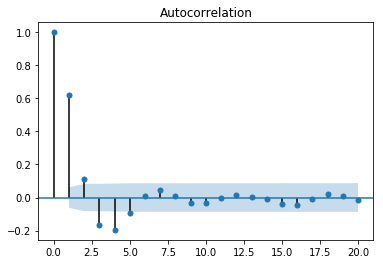

In [92]:
acf=plot_acf(values,lags=20)

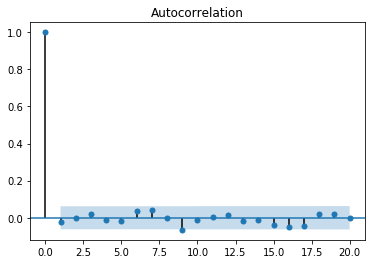

In [93]:
acf1=plot_acf(results.resid,lags=20)

In [ ]:
statsmodels.tsa.arima_process.ArmaProcess(ar, ma, nobs=100)#创建

In [ ]:
参数：
ar：array_like，1d
自回归滞后多项式的系数，包括零滞后。 
ma：array_like，1d
移动平均滞后多项式的系数，包括零滞后
nobs：int，可选
模拟时间序列的长度。

In [ ]:
statsmodels.tsa.arima_model.ARMA(endog, order, exog=None, dates=None, freq=None, missing='none')#拟合

时间序列检验

In [ ]:
stattools.acovf（x [，unbiased，demean，fft，...]）一维自协方差
stattools.acf（x [，unbiased，nlags，qstat，...]）一维数组的自相关函数。
stattools.pacf（x [，nlags，method，alpha]）估计部分自相关
stattools.pacf_yw（x [，nlags，method]）用非递归yule_walker估计的部分自相关
stattools.pacf_ols（x [，nlags]）计算部分自相关
stattools.ccovf（x，y [，unbiased，demean]）一维的交叉协方差
stattools.ccf（x，y [，无偏）]互相关函数
stattools.periodogram（X）返回X的固有频率的周期图
stattools.adfuller（x [，maxlag，regression，...]）增强的Dickey-Fuller单位根检验
stattools.kpss（x [，回归，滞后，存储]）Kwiatkowski-Phillips-Schmidt-Shin测试平稳性。
stattools.coint（y0，y1 [，趋势，方法，...]）单变量方程的非协整检验
stattools.bds（x [，max_dim，epsilon，distance]）计算独立于时间序列的BDS检验统计量
stattools.q_stat（x，nobs [，type]）返回的Ljung-Box Q统计量
stattools.grangercausalitytests（x，maxlag [，...]）两个时间序列格兰杰非因果关系的四个检验
stattools.levinson_durbin（s [，nlags，isacov]）自回归过程的Levinson-Durbin递归
stattools.arma_order_select_ic（y [，max_ar，...]）返回许多ARMA模型的信息标准
x13.x13_arima_select_order（endog [，...]）使用x12 / x13 ARIMA执行自动Seaonal ARIMA order识别。
x13.x13_arima_analysis（endog [，maxorder，...]）对月或季度数据执行x13-arima分析。

In [ ]:
statsmodels.tsa.kalmanf.kalmanfilter.KalmanFilter #卡尔曼滤波实现

# scipy (数学分布、最优化，插值，解方程)

In [ ]:
插值

In [143]:
import scipy.interpolate as spi
x = np.linspace(-2 * np.pi, 2 * np.pi, 25)

In [144]:
def f(x):
    return np.sin(x) + 0.5 * x

In [145]:
ipo = spi.splrep(x, f(x), k=1)#linear
iy = spi.splev(x, ipo)

Text(0,0.5,u'f(x)')

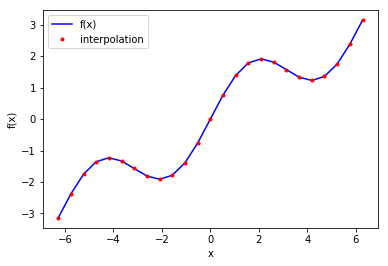

In [146]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, iy, 'r.', label='interpolation')
plt.legend(loc=0)
plt.xlabel('x')
plt.ylabel('f(x)')

Text(0,0.5,u'f(x)')

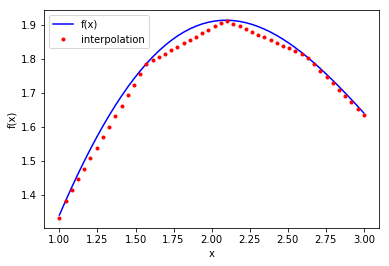

In [102]:
xd = np.linspace(1.0, 3.0, 50)
iyd = spi.splev(xd, ipo)
plt.plot(xd, f(xd), 'b', label='f(x)')
plt.plot(xd, iyd, 'r.', label='interpolation')
plt.legend(loc=0)
plt.xlabel('x')
plt.ylabel('f(x)')

Text(0,0.5,u'f(x)')

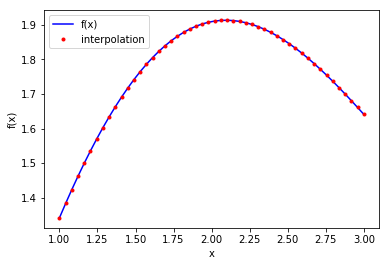

In [103]:
ipo = spi.splrep(x, f(x), k=3)#cubic spline
iyd = spi.splev(xd, ipo)
plt.plot(xd, f(xd), 'b', label='f(x)')
plt.plot(xd, iyd, 'r.', label='interpolation')
plt.legend(loc=0)
plt.xlabel('x')
plt.ylabel('f(x)')

凸优化

In [108]:
import scipy.optimize as spo
def fo((x, y)):
    z = np.sin(x) + 0.05 * x ** 2 + np.sin(y) + 0.05 * y ** 2
    if output == True:
        print '%8.4f %8.4f %8.4f' % (x, y, z)
    return z

In [110]:
output=True
spo.brute(fo, ((-10, 10.1, 5), (-10, 10.1, 5)), finish=None)

-10.0000 -10.0000  11.0880
-10.0000 -10.0000  11.0880
-10.0000  -5.0000   7.7529
-10.0000   0.0000   5.5440
-10.0000   5.0000   5.8351
-10.0000  10.0000  10.0000
 -5.0000 -10.0000   7.7529
 -5.0000  -5.0000   4.4178
 -5.0000   0.0000   2.2089
 -5.0000   5.0000   2.5000
 -5.0000  10.0000   6.6649
  0.0000 -10.0000   5.5440
  0.0000  -5.0000   2.2089
  0.0000   0.0000   0.0000
  0.0000   5.0000   0.2911
  0.0000  10.0000   4.4560
  5.0000 -10.0000   5.8351
  5.0000  -5.0000   2.5000
  5.0000   0.0000   0.2911
  5.0000   5.0000   0.5822
  5.0000  10.0000   4.7471
 10.0000 -10.0000  10.0000
 10.0000  -5.0000   6.6649
 10.0000   0.0000   4.4560
 10.0000   5.0000   4.7471
 10.0000  10.0000   8.9120


array([0., 0.])

In [111]:
output = False
opt1 = spo.brute(fo, ((-10, 10.1, 0.1), (-10, 10.1, 0.1)), finish=None)#smaller step
opt1

array([-1.4, -1.4])

In [112]:
output = True
opt2 = spo.fmin(fo, opt1, xtol=0.001, ftol=0.001, maxiter=15, maxfun=20)
opt2

 -1.4000  -1.4000  -1.7749
 -1.4700  -1.4000  -1.7743
 -1.4000  -1.4700  -1.7743
 -1.3300  -1.4700  -1.7696
 -1.4350  -1.4175  -1.7756
 -1.4350  -1.3475  -1.7722
 -1.4088  -1.4394  -1.7755
 -1.4438  -1.4569  -1.7751
 -1.4328  -1.4427  -1.7756
 -1.4591  -1.4208  -1.7752
 -1.4213  -1.4347  -1.7757
 -1.4235  -1.4096  -1.7755
 -1.4305  -1.4344  -1.7757
 -1.4168  -1.4516  -1.7753
 -1.4305  -1.4260  -1.7757
 -1.4396  -1.4257  -1.7756
 -1.4259  -1.4325  -1.7757
 -1.4259  -1.4241  -1.7757
 -1.4304  -1.4177  -1.7757
 -1.4270  -1.4288  -1.7757


array([-1.42702972, -1.42876755])

In [113]:
output = False
spo.fmin(fo, (2.0, 2.0), maxiter=250)#初始值很重要

Optimization terminated successfully.
         Current function value: 0.015826
         Iterations: 46
         Function evaluations: 86


array([4.2710728 , 4.27106945])

In [114]:
from math import sqrt
#目标函数
def Eu((s, b)):
    return -(0.5 * sqrt(s * 15 + b * 5) + 0.5 * sqrt(s * 5 + b * 12))
# constraints
cons = ({'type': 'ineq', 'fun': lambda (s, b): 100 - s * 10 - b * 10})#》=0
# 上下限
bnds = ((0, 1000), (0, 1000)) # uppper bounds large enough

In [115]:
spo.minimize(Eu, [5, 5], method='SLSQP',
bounds=bnds, constraints=cons)

     fun: -9.700883611487832
     jac: array([-0.48508096, -0.48489535])
 message: 'Optimization terminated successfully.'
    nfev: 21
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([8.02547122, 1.97452878])

积分

In [116]:
import scipy.integrate as sci

In [117]:
def f(x):
    return np.sin(x) + x**2

In [118]:
a = 0.5 # left integral limit
b = 9.5 # right integral limit
x = np.linspace(0, 10)
y = f(x)

In [120]:
sci.fixed_quad(f, a, b)[0]

287.61699596708456

In [119]:
sci.quad(f, a, b)[0]

287.62475471808676

In [121]:
sci.romberg(f, a, b)

287.62475471839196

分布

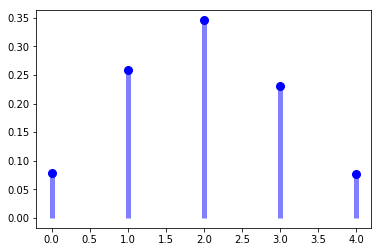

In [122]:
from scipy.stats import binom
fig, ax = plt.subplots(1, 1)
n, p = 5, 0.4
x = np.arange(binom.ppf(0.01, n, p),
 binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

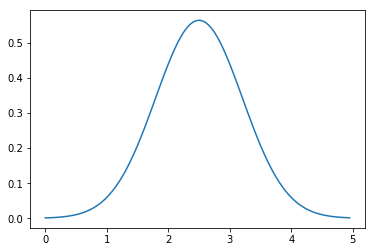

In [124]:
from scipy.stats import multivariate_normal
x = np.linspace(0, 5, 100, endpoint=False)
y = multivariate_normal.pdf(x, mean=2.5, cov=0.5) 
fig1 = plt.figure()
ax = fig1.add_subplot(111)
ax.plot(x, y)

In [ ]:
describe（a [，axis，ddof，bias，nan_policy]）计算传递数组的几个描述性统计量。
gmean（a [，axis，dtype]）计算沿指定轴的几何平均值。
hmean（a [，axis，dtype]）计算沿指定轴的调和平均值。
kurtosis（a [，axis，fisher，bias，nan_policy]）计算数据集的峰度（Fisher或Pearson）。
kurtosistest（a [，axis，nan_policy]）测试数据集是否具有正常峰度。
mode（a [，axis，nan_policy]）返回传递数组中模态（最常见）值的数组。
moment（a [，moment，axis，nan_policy]）计算样本平均值的第n个矩。
normaltest（a [，axis，nan_policy]）测试样本是否与正态分布不同。
skew（a [，轴，偏差，nan_policy]）计算数据集的偏度。
skewtest（a [，axis，nan_policy]）测试倾斜是否与正态分布不同。

# 金融数据处理

频率

数据的频率

数据的频率是设计算法时最重要的考虑因素之一
交易系统。它会影响每一个关于数据存储的设计决定，回溯测试
策略和执行算法。
简单地说，更高频率的策略可能会导致更强大的统计分析
，更多的数据点（从而交易）将被使用。 HFT策略经常
需要花费大量时间和资金来开发必要的软件
执行它们。
较低频率策略更容易开发和部署，因为它们需要较少的自动化。
然而，他们往往产生的交易远少于高频率策略
。
1. 每周和每月的数据
基本数据通常以每周，每月，每季度甚至每年为基础报告。这样
数据包括工资数据，对冲基金业绩报告，美国证券交易委员会文件，基于通货膨胀的指数
（如消费物价指数，CPI），经济增长和企业账户。
这种数据的存储通常适用于非结构化数据库，例如MongoDB，它可以
处理分层嵌套的数据，从而允许合理的查询能力。
另一种方法是将平面文本文本存储在RDBMS中。
2. 每日数据
大多数零售算法交易商都使用每日（“每日结束”/ EOD）财务时间
系列数据，尤其是股票和外汇。。通常会存储结束日期数据
在RDBMS中，由于股票行情/符号映射的本质自然适用于关系模型。
EOD数据不需要特别大的存储。
3. intraday
当日策略经常使用每小时，十五分钟，五分钟，一分钟或二分钟的OHLCV
bar。 QuantQuote和DTN IQFeed等即日提要供应商通常会提供详细的信息
或者其次根据他们的时间点数据。
由于没有交易，因此在这些频率下的数据将拥有许多“缺失”栏
在那段时间内进行。pandas可以用来填充这些值，尽管
数据准确性可能降低。

读取

In [ ]:
yahoo finance/google finance/quandl/bloomberg

In [125]:
import pandas_datareader.data as web
symbol = 'WIKI/AAPL'  # or 'AAPL.US'
df = web.DataReader(symbol, 'quandl', '2015-01-01', '2017-03-05')

In [ ]:
import pandas as pd
import tia.bbg.datamgr as dm

mgr = dm.BbgDataManager()
sids = mgr['MSFT US EQUITY', 'IBM US EQUITY', 'CSCO US EQUITY']
df = sids.get_historical('PX_LAST', '1/1/2014', '11/12/2014')

处理

In [126]:
frame = pd.DataFrame(np.random.randn(2, 4),index=pd.date_range('1/1/2000', periods=2,
freq='W-WED'),
columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-1.120287,-0.799569,-1.138659,1.582892
2000-01-12,0.931085,0.516239,-1.353135,1.899021


In [127]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-1.120287,-0.799569,-1.138659,1.582892
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.931085,0.516239,-1.353135,1.899021


In [135]:
day=frame.resample('D').ffill()
day

,Colorado,Texas,New York,Ohio
2000-01-05,-1.120287,-0.799569,-1.138659,1.582892
2000-01-06,-1.120287,-0.799569,-1.138659,1.582892
2000-01-07,-1.120287,-0.799569,-1.138659,1.582892
2000-01-08,-1.120287,-0.799569,-1.138659,1.582892
2000-01-09,-1.120287,-0.799569,-1.138659,1.582892
2000-01-10,-1.120287,-0.799569,-1.138659,1.582892
2000-01-11,-1.120287,-0.799569,-1.138659,1.582892
2000-01-12,0.931085,0.516239,-1.353135,1.899021


In [148]:
ret=day.pct_change().dropna()
ret

,Colorado,Texas,New York,Ohio
2000-01-06,0.000000,0.000000,0.000000,0.000000
2000-01-07,0.000000,0.000000,0.000000,0.000000
2000-01-08,0.000000,0.000000,0.000000,0.000000
2000-01-09,0.000000,0.000000,0.000000,0.000000
2000-01-10,0.000000,0.000000,0.000000,0.000000
2000-01-11,0.000000,0.000000,0.000000,0.000000
2000-01-12,-1.831113,-1.645647,0.188359,0.199717


In [131]:
res = sm.tsa.seasonal_decompose(day['New York'])

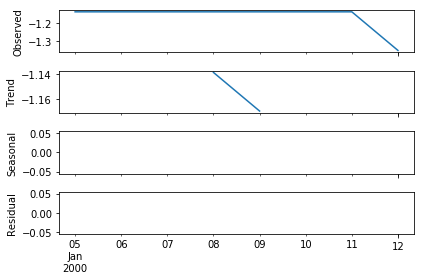

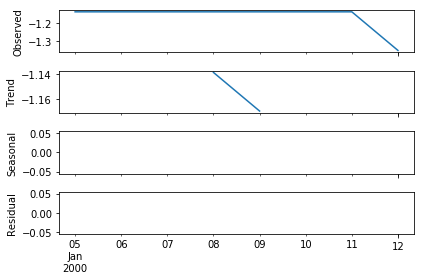

In [134]:
res.plot()#x_t-x_(t-d)